# Introduction to Transformers in Vision
## 1. Goals
###    - What is a Transformer?
###    - How are Transformers being used in vision?
## 2. Overview of "Attention Is All You Need"
###    - The guts of a Transformer
###    - Self supervised training
###    - Interpreting the attention mechanism
## 3. Overview of "An Image Is Worth 16x16 Words: Transformers For Image Recognition At Scale" + more
###    - Adapting Transformers for vision
###    - Self supervised learning in vision (DINO)
###    - Interpreting VITs 
## 4. Potential follow ups
###    - SwinTransformers - Universal vision models
###    - Plugging Transformers into different CV tasks

![hvs](media/transformer_arch.png)

## Combines a bunch of ideas
### 1. Learned input embeddings - typically words/tokens, but in vision it will be segments of images. To learn, we start with a random initialization and let gradients flow all the way back into the embedding vector
### 2. Attention - compares "query", "key", and "value" vectors to create a weighting of the values based on the key and query. In "self-attention", Q,K,V are all the same. For encoder/decoder, query comes from the input sequence while key/value come from current outputs.
### 3. Positional encoding - add on an embedding vector which only depends on the position. Important because attention mechanism does not take order into account.
### 4. Add/Norm - makes it so that each layer is learning a residual on top of the last layer. Similar idea to ResNet. 
### 5. Position-wise feed forward network - preserves the sequence when aggregating information across attention heads


![hvs](media/attention.png)

## Easiest way to learn? Follow the dimensions!
## Key mathematical trick - organize matrix multiplications so that dimensions with variable length cancel out.

In [76]:
import numpy as np
# Self attention on a single sentence, with 10 dimensional embedding vectors
sentence = ['the', 'cat', 'is', 'fluffy']
embedding = np.random.rand(len(sentence), 10)
embedding.shape

(4, 10)

In [77]:
dotted = np.matmul(embedding, np.transpose(embedding))
dotted.shape

(4, 4)

In [78]:
import math
scaled = dotted / math.sqrt(10)

In [79]:
import scipy
attention_distribution = scipy.special.softmax(scaled, axis=0)

In [80]:
after_attention = np.matmul(attention_distribution, embedding)
after_attention.shape

(4, 10)

## Shape ends up the same!

## Self-supervised learning in NLP
### 1. Fill in the blank (BERT)
### 2. Finish the sentence (GPT)

### Big innovation - train on huge datasets using self-supervised objective. Start with learned weights and perform fine-tuning to solve specific problems (classification, translation, etc)

# Interpreting attention - Attention Rollout
Finds which parts of the input contribute most to each possible class

https://huggingface.co/spaces/amsterdamNLP/attention-rollout

# Adapting Transformers for vision

### 1. Break image into patches
### 2. Treat image as a sequence of patches, learn a patch embedding function
### 3. Use learned positional encodings, 1-d or 2-d doesn't matter

![image.png](media/VIT_Arch.png)

# Self supervision in vision

https://ai.facebook.com/blog/dino-paws-computer-vision-with-self-supervised-transformers-and-10x-more-efficient-training/

### Why not fill in the blank for images? I don't know!

## Investigating Vision Transformer representations 

https://keras.io/examples/vision/probing_vits/

In [28]:
from libraries.attention_heat_maps import *

200
1/1 [==============================] - 1s 781ms/step


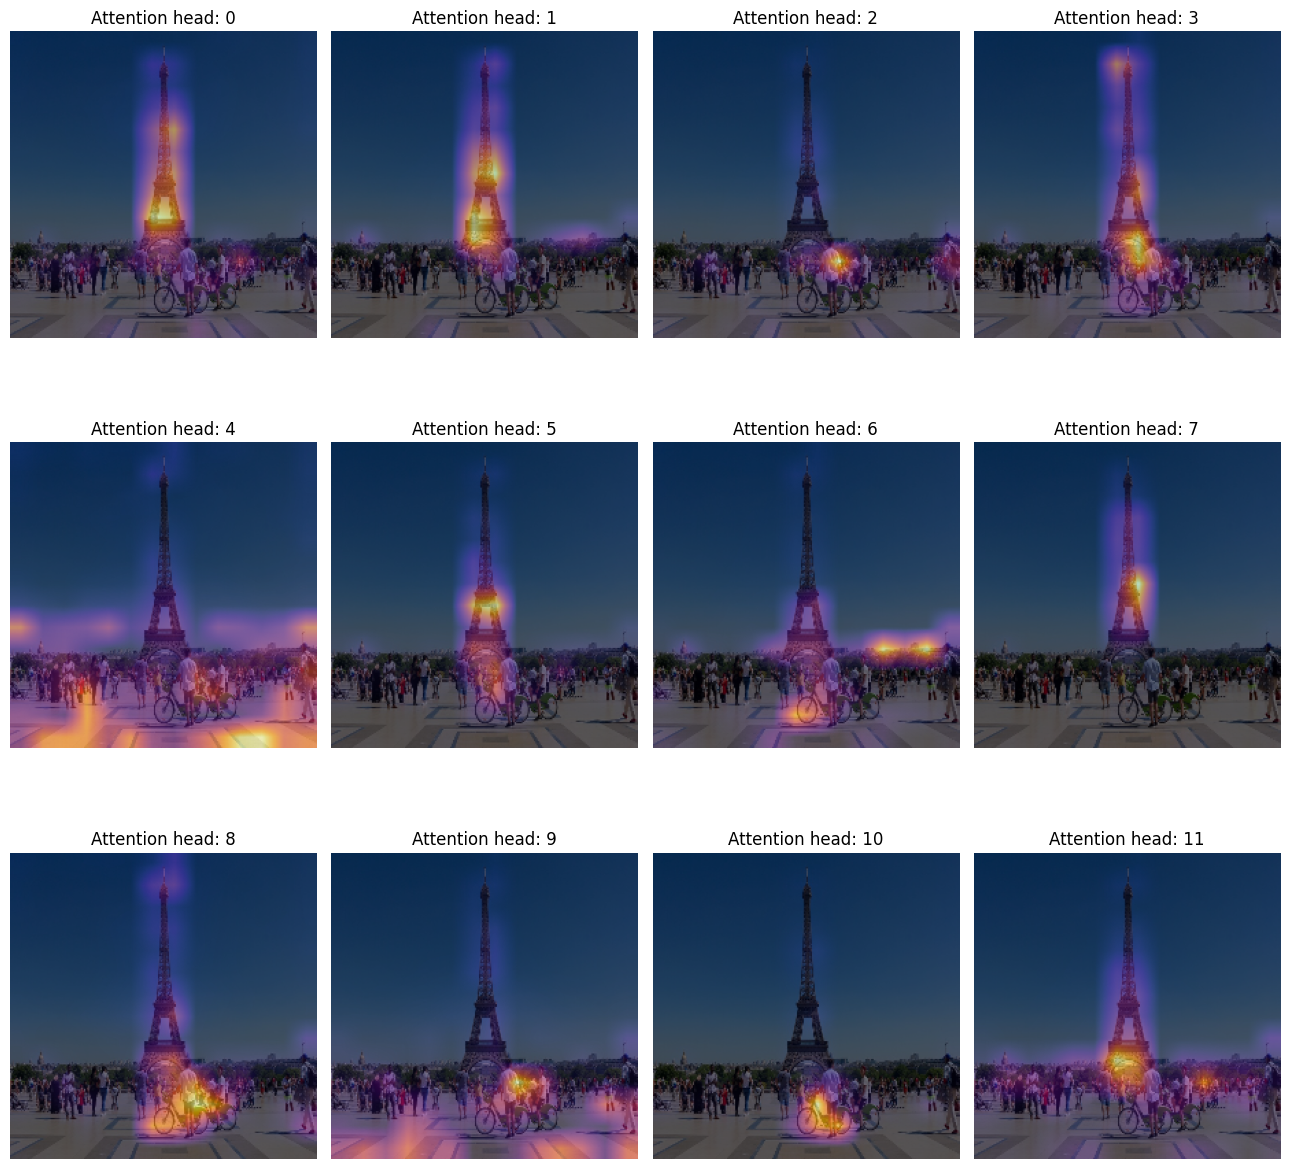

In [26]:
# Show the attention maps
# Taco Bell 'https://s.abcnews.com/images/Business/HT_Taco_bell_kids_menu_nt_130722_16x9_992.jpg'
# Shark 'https://images.immediate.co.uk/production/volatile/sites/23/2020/08/Great-white-shark.-GettyImages-500583044-18edc45-scaled.jpg'
# Eiffel Tower 'https://media.meer.com/attachments/3a17ad63e71be4d177392373d38d7298bd8c54cf/store/fill/860/645/01f84500a8ab9a7aee4743e2fba3db94f913f106a2bb6671bf9ab250954c/Eiffel-Tower-View-from-the-Esplanade.jpg'
generate_heatmaps('https://media.meer.com/attachments/3a17ad63e71be4d177392373d38d7298bd8c54cf/store/fill/860/645/01f84500a8ab9a7aee4743e2fba3db94f913f106a2bb6671bf9ab250954c/Eiffel-Tower-View-from-the-Esplanade.jpg')

# Potential follow ups
### 1. SwinTransformer - current SOTA for "large vision models". Make VIT more efficient 
### 2. How do Transformers plug into classification, detection, segmentation tasks? How do they fit with previous architectures which were sometimes specialized to the task?

### Group feedback on directions for Week 4??